<Algoritmo usando programación dinámica.</h1>

<h3>1. Es posible transformar algorithm en analysis sin usar operaciones “izquierda”. Escriba una secuencia
de operaciones (de la misma forma que la tabla de ejemplo) que tenga el mismo costo que el mostrado
en el ejemplo pero sin usar operaciones “izquierda”.</h3>


<pre>Operación           z          Costo         Total</pre>
<pre>inicialización    algorithm      0             0</pre>
<pre>derecha           algorithm      0             0</pre>
<pre>insertar n        anlgorithm     3             3</pre>
<pre>insertar a        analgorithm    3             6</pre>
<pre>derecha           analgorithm    0             6</pre>
<pre>reemplazar(y)     analyorithm    4             10</pre>
<pre>reemplazar(s)     analysrithm    4             14</pre>
<pre>reemplazar(i)     analysiithm    4             18</pre>
<pre>reemplazar(s)     analysisthm    4             22</pre>
<pre>eliminar          analysishm     2             24</pre>
<pre>eliminar          analysism      2             26</pre>
<pre>eliminar          analysis       2             28</pre>

<h3>2. Muestre que para dos cadenas x y y con distancia de edici´on d(x, y), existe una secuencia S de operaciones
que transforman x en y con costo d(x, y) donde S no contiene operaciones “izquierda”.</h3>

Al igual que en la demostración del punto anterior, en comparación con la demostración dada en el enunciado con operaciones izquierda(en dónde son necesarias porque las modificaciones no se realizan en orden), toda operación izquierda puede revertirse con una operación derecha, por lo tanto, siempre se podrá evitar dar una operación izquierda si se empiezan a hacer los cambios de manera ordenada y moviéndose a la derecha.

<h3>3. Muestre que el problema de calcular la distancia de edici´on d(x, y) presenta una subestructura ´optima.
(Considere todos los sufijos de x y y)
</h3>

<h3>4. Recursivamente defina el valor de la distancia de edici´on d(x, y) en terminos de los sufijos de las cadenas
x y y. Señale como la distancia de edici´on contiene sobrelapamiento de los subproblemas.</h3>

La recursión en términos de los  suficos podría definirse en 3 casos base:<br>
$recdist(a,b,tamA,tamB)=0$ $si$ $tamA == 0$ $y$ $tamB == 0$<br>
$recdist(a,b,tamA,tamB)=tamB$ $si$ $tamA == 0$ <br>
$recdist(a,b,tamA,tamB)=tamA$ $si$ $tamB == 0$<br>
Si no se cumple ninguno, se retorna el valor mínimo entre: <br>
<pre>min(rec_dist(a, b, tamA-1, tamB-1) + x, rec_dist(a, b, tamA-1, tamB) + 2, rec_dist(a, b, tamA, tamB-1) + 3)</pre>

En este caso se presenta el sobrelapamiento, ya que en cadenas con amplias sumbsecuencias comunes máximas entre si, se puede llamar múltiples veces la misma recursión.<br>
A continuación una implementación recursiva:

In [38]:
def rec_dist(a,b,tamA,tamB):

    if(tamA == 0 and tamB == 0):  
        return 0
    if(tamA == 0):          
        return tamB
    if( tamB == 0 ):         
        return tamA
    
    x=4
    if (a[tamA-1] == b[tamB-1]):
        x=0                 
     
    
    return  min(rec_dist(a, b, tamA-1, tamB-1) + x, rec_dist(a, b, tamA-1, tamB) + 3, rec_dist(a, b, tamA, tamB-1) + 2)

def rec_edit_distance(a,b):
    return rec_dist(a,b,len(a),len(b))


In [39]:
x= rec_edit_distance ("analysis", "algorithm")
print x

20


<h3>5. Describa un algoritmo de programación dinámica que calcule la distancia de edici´on de x y y. (No use
memorización) Analise el tiempo de ejecuci´on y el espacio requeridos por su algoritmo.</h3>

En el algoritmo que se va a utilizar se requiere la creación de una matriz, de tamaño en filas del tamaño de la primera cadena + 1, y en columnas, del tamaño de la segunda cadena +1. Esta matriz debe inicializarse  en su primera fila, los números del 0 al tamaño de la cadena 1 +1; y en su primera columna, los números del 0 al tamaño de la cadena 2+1. 
Posteriormente, sen un ciclo anidado que recorra la matriz por filas y columnas(empezando en 1,1), se le debe asignar el valor a la respectiva celda, del mínimo resultado entre <pre>resp[i][j-1]+3, resp[i-1][j]+2, resp[i-1][j-1]+x</pre> siendo el primer caso inserción, el segundo eliminación, y el tercero, derecha cuando el valor de ambas cadenas en la respectiva posición sea igual($x=0$), o reemplazar de lo contrario ($x=4$).

El gasto en memoria de este algoritmo sería de: $(tamañoCadena1 +1)* (tamañoCadena2 +1)$ ya que solo se debe crear una matriz de tal tamaño.

El tiempo de ejecución teóricamente sería de $O(n*m)$ debido a que se utiliza un ciclo anidado recorrido $n*m$ veces.

A continuación se muestra el análisis experimental del tiempo de ejecución:

In [27]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_edit_distance(a, b, acct):
    
    resp=[]; acct.count()    
    tamA= len(a); acct.count()
    tamB= len(b); acct.count()
    
    for i in range(tamA+1):
        acct.count()
        resp.append((tamB+1)*[0]); acct.count()
        resp[i][0]=i; acct.count()
        
    for i in range(tamB+1):
        acct.count()
        resp[0][i] = i  ; acct.count() 
            
    for i in range(1, tamA+1):
        acct.count()
        for j in range(1, tamB+1): 
            acct.count()
            x=4 ; acct.count() 
            if (a[i-1] == b[j-1]):
                acct.count() 
                x=0; acct.count()
                
                
            resp[i][j] = min(resp[i][j-1]+3, resp[i-1][j]+2, resp[i-1][j-1]+x); acct.count() 

    return resp[tamA][tamB]

import random as rnd
import string
import time


def exper_analysis(n):
    results = []
    tiempo=[]    
    acct = Counter()
    for i in range (1,n):
        x="".join(rnd.choice(string.ascii_uppercase)for _ in range (i))
        y="".join(rnd.choice(string.ascii_uppercase)for _ in range (i))
        acct.reset
        tic = time.clock()#get start time
        acct_edit_distance(x,y,acct)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
        results.append(acct.steps)
        
    r= [tiempo, results]
    
    return r

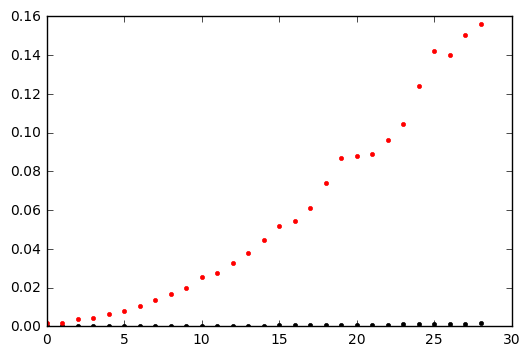

In [28]:
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline
pl.figure (1)
x=np.arange(29)
res=(exper_analysis(30))
p=np.array(res[0])
t=np.array(res[0])*100
pl.plot(x, p, 'k.', t, 'r.')

<h3>6. Implemente su algoritmo en Python, y publiquelo en un NoteBook donde lo pruebe para las cadenas:
x = software engineering, y = computer science</h3>

In [30]:
def edit_distance(a, b):
    
    resp=[]    
    tamA= len(a)
    tamB= len(b)
    
    for i in range(tamA+1):
        resp.append((tamB+1)*[0])
        resp[i][0]=i
        
    for i in range(tamB+1):
         resp[0][i] = i   
            
    for i in range(1, tamA+1):
        for j in range(1, tamB+1):            
            x=4
            if (a[i-1] == b[j-1]):
                x=0
                
            resp[i][j] = min(resp[i][j-1]+3, resp[i-1][j]+2, resp[i-1][j-1]+x)

    return resp[tamA][tamB]

In [31]:
x=edit_distance ("software engineering", "computer science")
print x

44


<h3>7. Ejecute su programa para las tres instancias proveidas en 3 archivos de texto plano, donde cada archivo
contiene las siguientes cuatro l´ıneas:
</h3>

In [12]:
print "Instancia 1"

inf = open("ps7_input1.txt")
p=[]
for l in inf:
    p.append(l)
inf.close()

result=edit_distance (p[1],p[3])
print result

Instancia 1
1601


In [10]:
print "Instancia 2"

inf = open("ps7_input2.txt")
p=[]
for l in inf:
    p.append(l)
inf.close()

result=edit_distance (p[1],p[3])
print result

Instancia 2
1687


In [11]:
print "Instancia 3"

inf = open("ps7_input3.txt")
p=[]
for l in inf:
    p.append(l)
inf.close()

result=edit_distance (p[1],p[3])
print result

Instancia 3
1431
